# Object Detection in Dark Images

## Business problem

Object Detection has attracted the much research attention due to its
close relationship with image understanding and video analysis, Also
the resent advancements in Self-Driving cars, Autonomous vehicle
detection and counting systems. 

Object Detection with Deep Learning techniques has some
challenges in detecting the objects in the images with extremely low
light. The low light conditions can emerge depending on time of the
day and availability of light sources. The impact of these image
variations on the state of the art algorithms can be evaluated by
checking their performances on this kind of datasets/images.

### Problem Statement

Our task here is to evaluate the state of the art algorithm like YOLO v3 performance on Exclusive Dark Image Dataset.

## Deep Learning Problem 

### Dataset Overview

- The Dataset used is 'Exclusively Dark Image Dataset'.
- The Dataset can be downloaded from here - https://github.com/cs-chan/Exclusively-Dark-Image-Dataset
- The ExDARK is a low-light object image dataset, where an image is categorized as low-light if it has either low or significant variations in illumination. 
- The dataset currently has 7363 images with 12 object classes namely Bicycle, Boat, Bottle, Bus, Car, Cat, Chair, Cup, Dog, Motorbike, People, and Table.
- Also these images are from 10 types of low-light conditions like:
  Low, Ambient, Object, Single, Weak, Strong, Window, Screen, Shadow, Twilight. 
- Provided dataset is categorized in object level and also the bounding boxes annotations are included. 

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [ ]:
root_dir = 'ExDark'

In [ ]:
annotations_file = root_dir+'/Annotations/imageclasslist.txt'
readme = root_dir+'/ReadMe.txt'
with open(readme, 'r') as f: # readme file 
    print(f.read())

The Exclusively Dark Dataset

Details
The Exclusively Dark (ExDark) Dataset consists of object images captured in low-light conditions collected from various sources. Containing 7,363 images, all of which are annotated with 12 object classes using bounding box and as image class. Additionally, the images are annotated with 10 lighting types. This is a challenging dataset as it contains only low-light images of varying environments and complexity.

There are two(2) folders associated with the dataset and a ReadMe file:
1. Dataset
	- Consisting 12 folders holding the low-light images, labeled with the image classes
2. Annotation
	- Contains 12 folders holding the bounding box annotation txt file for each image in the dataset
	- imageclasslist.txt contains the list of image names, image class, lighting type, indoor/outdoor, and the train/validation/test set annotations.
	- The data is separated into 3,000 images as the training set (250 image/class), 1,800 images as the validation set (15

In [ ]:
#creating dictionaries for further usage for different conditions mentioned above

light_dic = {1:'Low',2: 'Ambient',3:'Object',4:'Single',5:'Weak',6:'Strong',7:'Screen',8:'Window',9:'Shadow',10:'Twilight'}
class_dic = {1:'Bicycle',2:'Boat',3:'Bottle',4:'Bus',5:'Car',6:'Cat',7:'Chair',8:'Cup',9:'Dog',10:'Motorbike',11:'People',12:'Table'}
in_out_dic = {1:'Indoor',2:'outdoor'}
train_val_test = {1:'train',2:'val',3:'test'}

In [ ]:
#creating the .csv file from the data given in annotations text file

file_path =[]
labels =[]
lightings = []
indoor_outdoor =[]
train_val_test =[]

with open(annotations_file,'r') as f:
    for i,line in enumerate(f):
        if i==0:
            continue
        label = int(line.split()[1])
        light = int(line.split()[2])
        in_out = int(line.split()[3])
        dataset = int(line.split()[4])
        
        path = root_dir+'/Dataset/'+class_dic[label]+'/'+line.split()[0]
        file_path.append(path)
        labels.append(label)
        lightings.append(light)
        indoor_outdoor.append(in_out)
        train_val_test.append(dataset)
        

In [ ]:
df = {'path':file_path, 'classes':labels, 'light':lightings, 'indoor_outdoor':indoor_outdoor,'train_val_test':train_val_test}
data = pd.DataFrame(df)

In [ ]:
print('Dataset shape:',data.shape)
data.head()

Dataset shape: (7363, 5)


path  classes  light  indoor_outdoor  \
0  ExDark/Dataset/Bicycle/2015_00001.png        1      2               1   
1  ExDark/Dataset/Bicycle/2015_00002.png        1      6               2   
2  ExDark/Dataset/Bicycle/2015_00003.png        1      5               2   
3  ExDark/Dataset/Bicycle/2015_00004.jpg        1      3               2   
4  ExDark/Dataset/Bicycle/2015_00005.jpg        1      6               2   

   train_val_test  
0               1  
1               1  
2               1  
3               1  
4               1

In [ ]:
data.to_csv('processed_data.csv',index=False)

### Analysis and visualization

In [ ]:
def get_class_analysis(label):
    
    df = data[data['classes']==label]
    
    in_out = dict(df['indoor_outdoor'].value_counts())
    
    light_cond = dict(df['light'].value_counts())
    
    print('The '+class_dic[label] + ' data shape is', df.shape)
    
    in_out_label =[]
    in_out_cnt =[]
    for i,j in in_out.items():
        in_out_label.append(in_out_dic[i])
        in_out_cnt.append(j)
    
    light_label =[]
    light_cnt =[]
    for i,j in light_cond.items():
        light_label.append(light_dic[i])
        light_cnt.append(j)
    
    
    f,ax = plt.subplots(2,1,figsize=(16,8))
    ax1= sns.barplot(x=in_out_label,y=in_out_cnt,ax=ax[0])
    ax1.set_title('Indoor/outdoor Disb')
    ax2= sns.barplot(x=light_label,y=light_cnt,ax=ax[1])
    ax2.set_title('Lighting conditions Disb')
    plt.show()
   

In [ ]:
def plot_sample_images(label,n):
    
    images =[]
    light =[]
    df = data[data['classes']==label]
    for i in range(1,11):
        temp = list(df[df['light']==i]['path'])[0:n]
        if len(temp)>2:
            for j in temp:
                light.append(i)
                images.append(j)
    
    print('Below are few of the '+class_dic[label] + ' images in different lighting conditions')

    fig, ax = plt.subplots(len(images)//n,n,figsize=(15,30),gridspec_kw={'wspace':0.01, 'hspace':0.1})
    ax = ax.ravel()
    
    for i,img in enumerate(images):

        im_org = cv2.imread(img)
        im_resized = cv2.resize(im_org, (300, 300), interpolation=cv2.INTER_LINEAR)
        ax[i].imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB),aspect="auto")
        ax[i].set_axis_off()  # corresponds to plt.subplot(x).axis('off')
        ax[i].set_xlim(ax[i].get_xlim())
        ax[i].set_ylim(ax[i].get_ylim())
        ax[i].set_title(light_dic[light[i]])


    plt.show()


<b> Object class Distribution

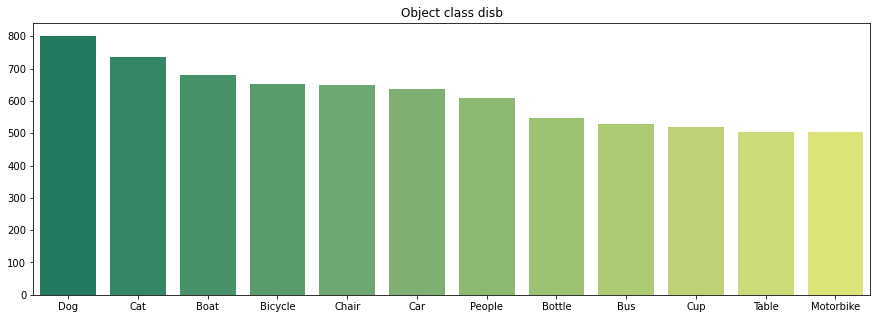

In [ ]:
class_labels = dict(data['classes'].value_counts())
labels =[]
count =[]
for i,j in class_labels.items():
    labels.append(class_dic[i])
    count.append(j)
plt.figure(figsize=(15,5))
sns.barplot(x=labels,y=count,palette='summer')
plt.title('Object class disb')
plt.show()
    

- The above plot is the count of different object classes available in the dataset. The count of each class is almost comparable.

<b> Analysis of few of the object classes along with visualization in different light conditions given

<b> Bicycle object Data Analysis

The Bicycle data shape is (652, 5)


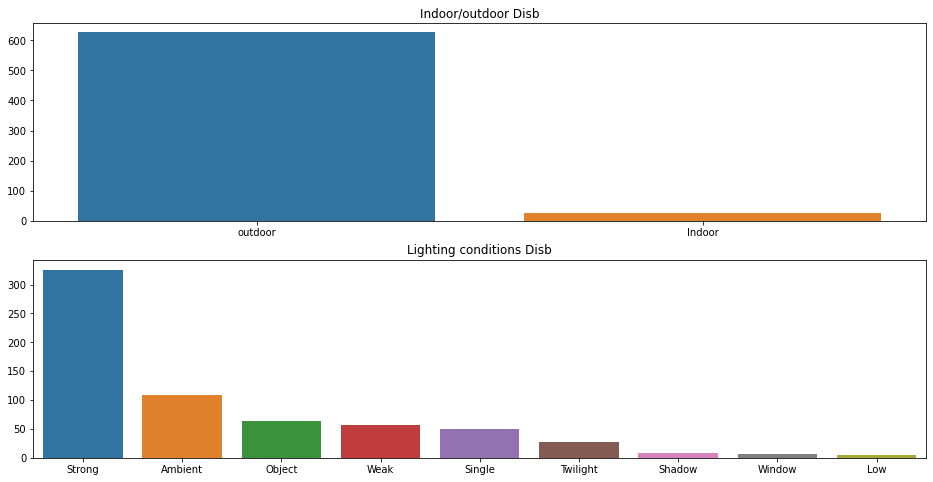

In [ ]:
get_class_analysis(1)

- There are 652 bicycle images.
- The images are from 10 different lightning conditions. Among them we see more images from 'strong' & 'ambient' conditions and very few from 'low', 'shadow', & 'window' conditions
- Also majority images are captured in outdoor.

Below are few of the Bicycle images in different lighting conditions


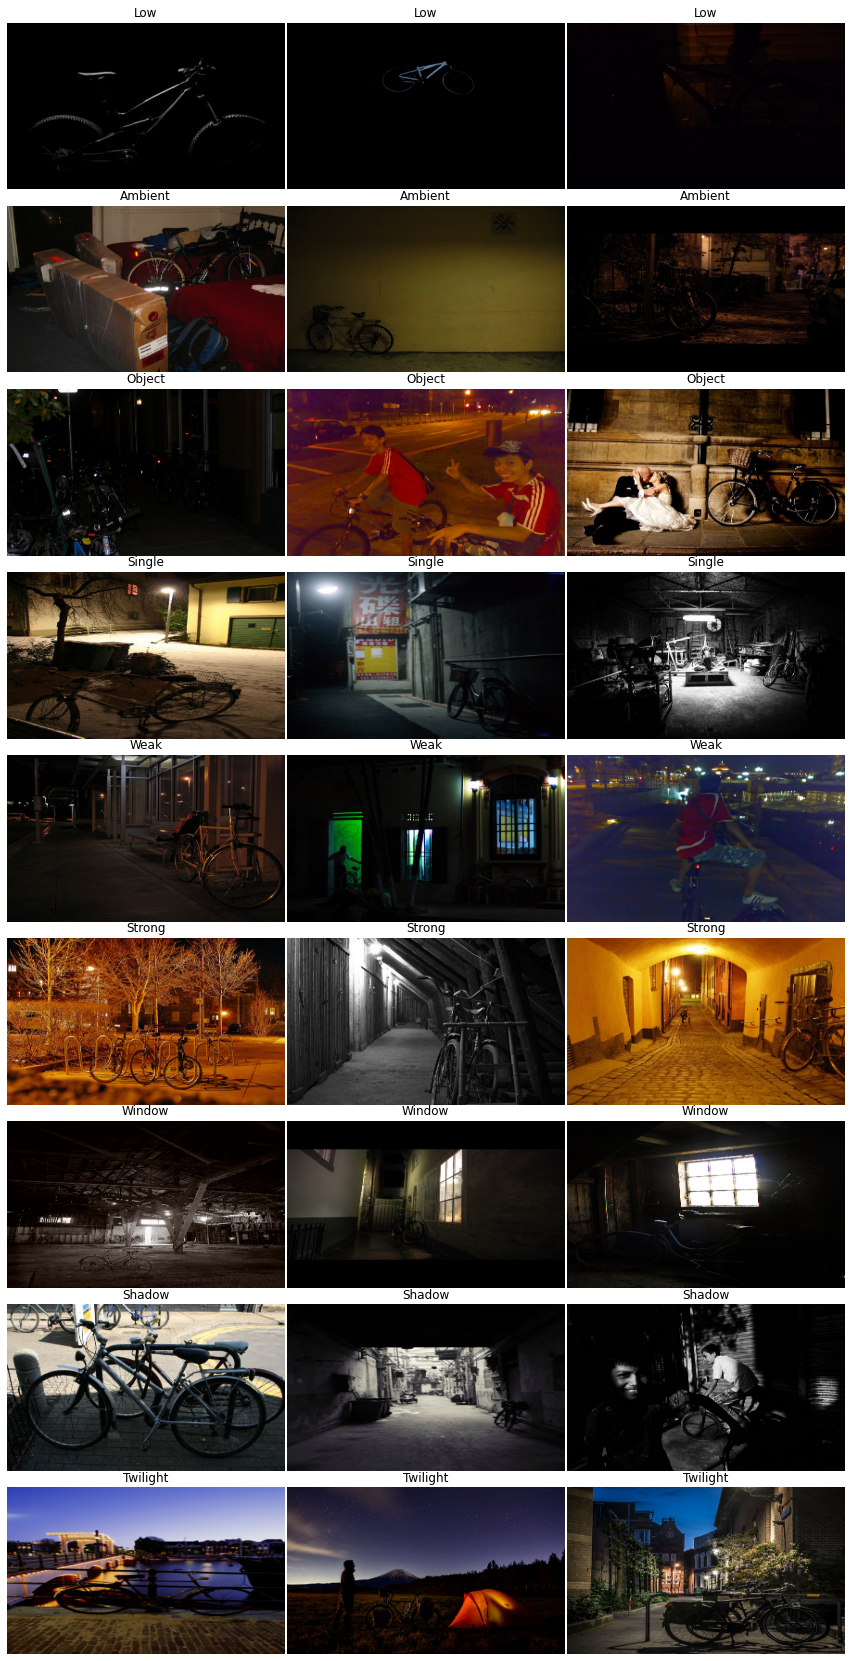

In [ ]:
plot_sample_images(1,3)

<b> Car Object Data Analysis

The Car data shape is (638, 5)


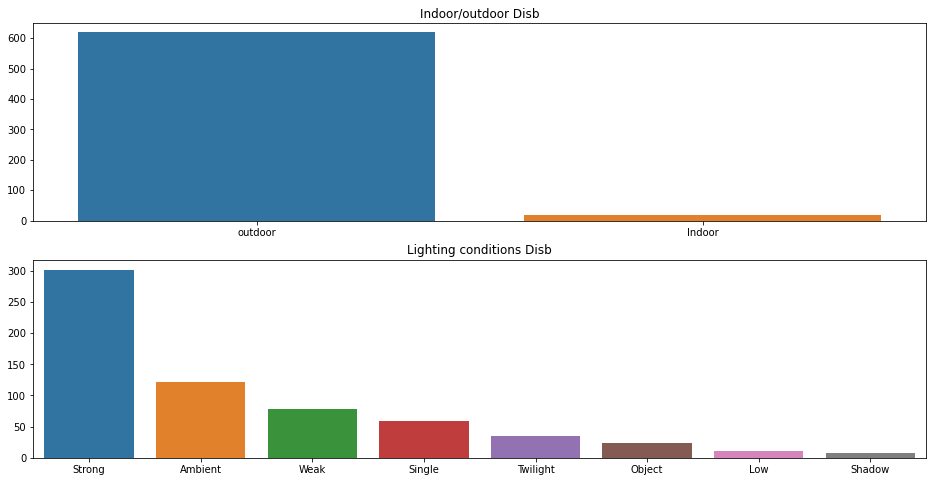

In [ ]:
get_class_analysis(5)

Below are few of the Car images in different lighting conditions


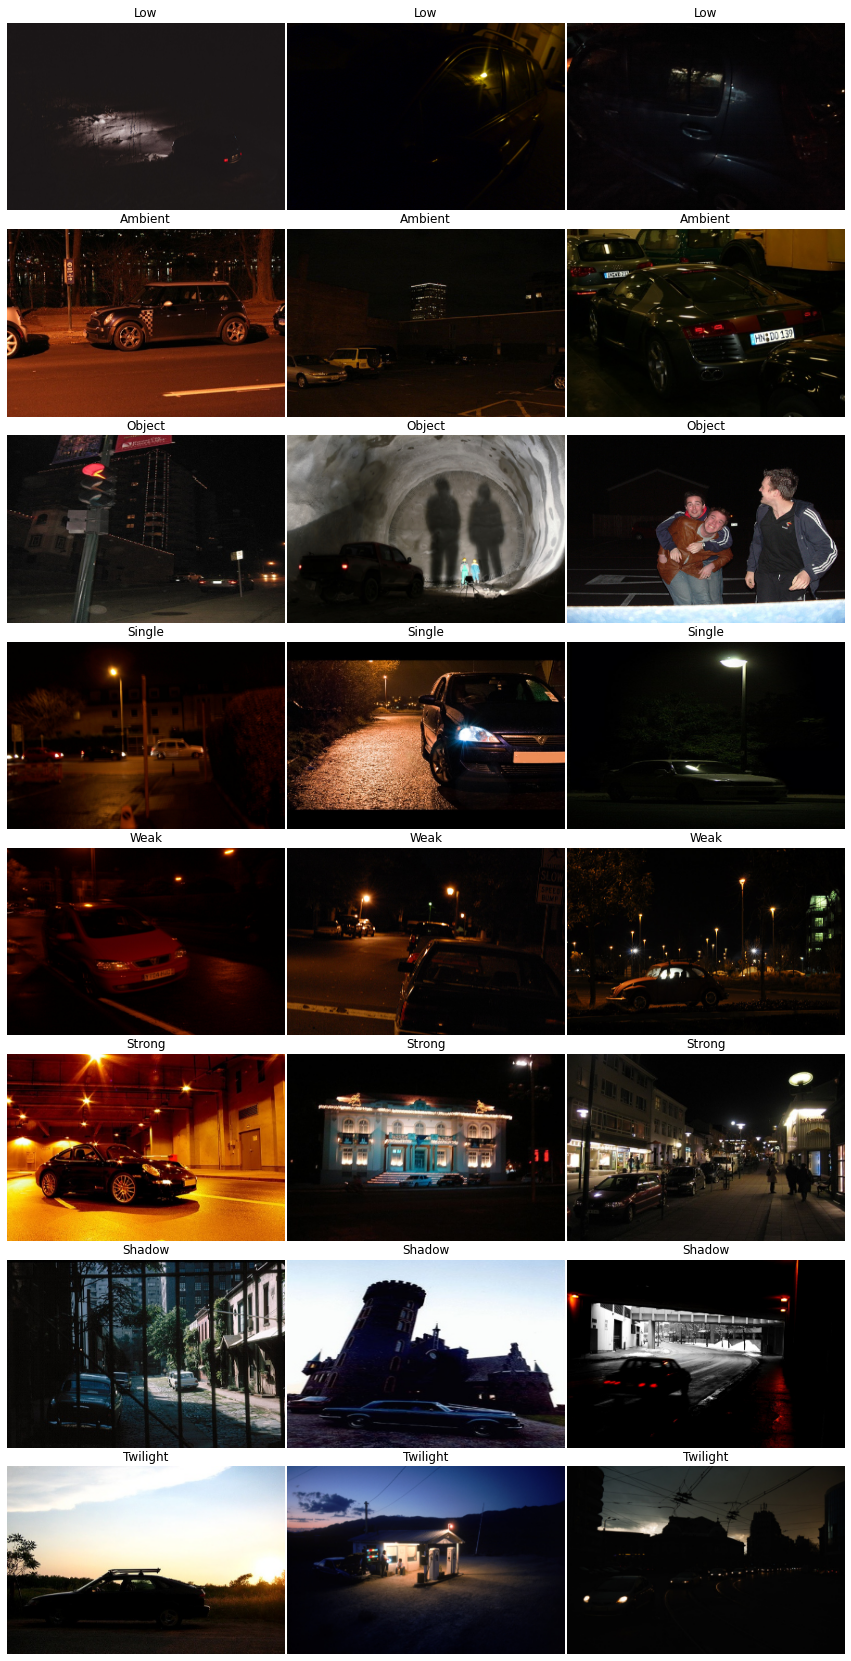

In [ ]:
plot_sample_images(5,3)

<b> Motorbike Object Data Analysis

The Motorbike data shape is (503, 5)


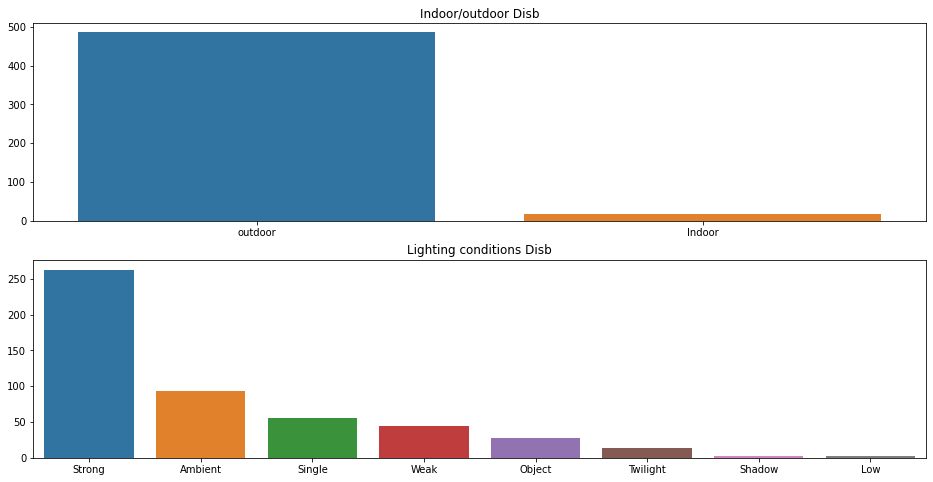

In [ ]:
get_class_analysis(10)

Below are few of the Motorbike images in different lighting conditions


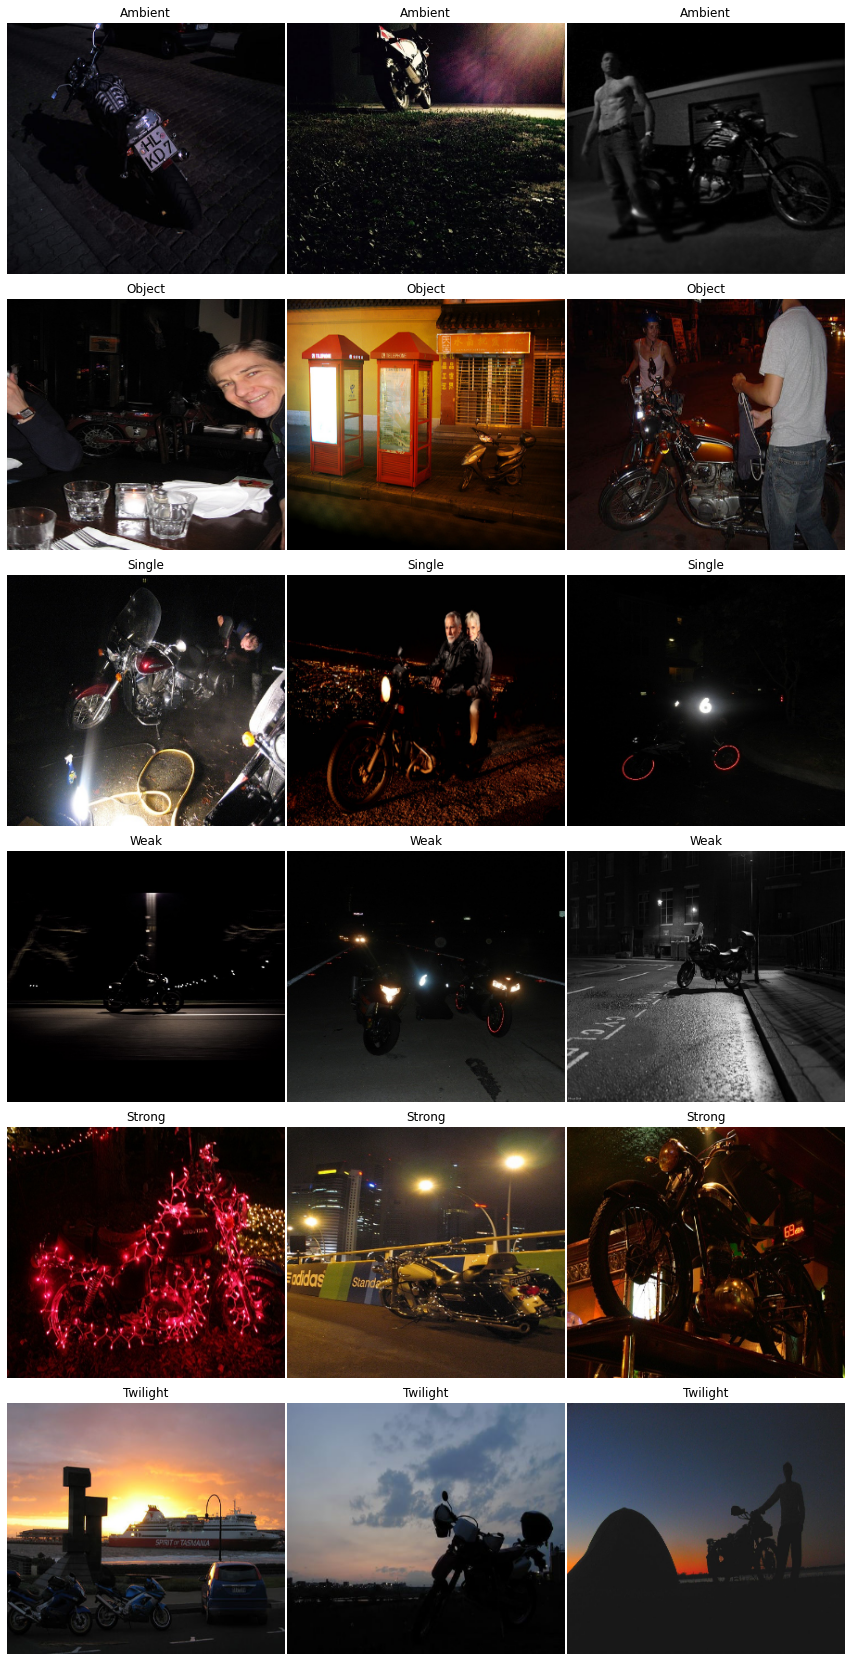

In [ ]:
plot_sample_images(10,3)

#### Observations from EDA:

- The indoor images are very less in number compared to outdoor images
- The lightning conditions included in this dataset might be a challenging in object detection.
- Seems like 'low' light condition images are difficult for object detection. Lets anlyze further if we can enhance this images by any CNN architecture / methods for better object detection.